In [39]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

$\Large First \ Attempt: \ A \ Crude \ Function$

In [40]:
"""
Defining a crude function to apply the sandpile algorithm:
"""


def sandpile(lattice, num_grains, h_t:int=4):
    avalanche_sizes_list = []
    for i in range(num_grains):
        # Choose a random tile to deposit a grain:
        index0, index1 = np.random.randint(low=1, high=lattice.shape[0]-1, size=2)
        # Deposit 1 sand grain:
        lattice[index0, index1] += 1
        # Reset timer to zero:
        timer = 0
        # Check for and time the avalanches:
        while (np.unique(lattice) >= h_t).any():
            # The x and y of the lattice matrix where there should be an avalanche:
            loc0 = np.where(lattice>=h_t)[0]
            loc1 = np.where(lattice>=h_t)[1]
            lattice[loc0, loc1] -= h_t
            lattice[loc0-1, loc1] += 1  # Up
            lattice[loc0, loc1+1] += 1  # Right
            lattice[loc0+1, loc1] += 1  # Down
            lattice[loc0, loc1-1] += 1  # Left
            # One avalanche has happened, so that's 1 time step:
            timer += 1
            # Reset border lines of the lattice matrix to zero:
            lattice[0, :] = 0
            lattice[-1, :] = 0
            lattice[:, 0] = 0
            lattice[:, -1] = 0
        # We are not interested in those times when there are no avalanches!
        if timer!=0:
            avalanche_sizes_list.append(timer)
    return avalanche_sizes_list

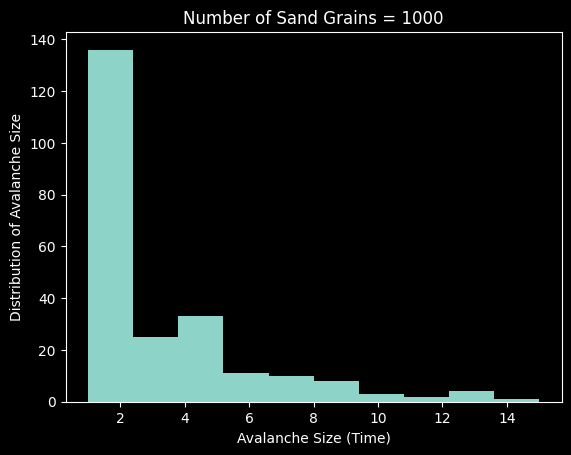

In [41]:
"""
Trying out the code:
"""


# L=500 and num_grains=1000 takes 6 seconds to execute.
# Lattice size (+2 for border lines):
L = 500 + 2
# Threshold height:
h_t = 4
# Initialize lattice and set the border lines to be zero:
lattice = np.random.randint(low=0, high=h_t, size=(L, L))
lattice[0, :] = 0
lattice[-1, :] = 0
lattice[:, 0] = 0
lattice[:, -1] = 0
num_grains = 1000
plt.hist(sandpile(lattice=lattice, num_grains=num_grains, h_t=4))
plt.title(f"Number of Sand Grains = {num_grains}")
plt.xlabel("Avalanche Size (Time)")
plt.ylabel("Distribution of Avalanche Size")
# plt.savefig(f"N{num_grains}.jpg")
plt.show();

$\Large A \ Little \ More \ Efficient: \ Using \ Numpy$

In [42]:
"""
The previous function takes a lot of time to execute for lattice sizes
more than 500. This is a more efficient redefinition of the previous function,
using numpy arrays instead of lists.
"""


def sandpile(lattice, num_grains, h_t:int=4, upper_bound:int=num_grains//100):
    avalanche_sizes_list = np.zeros(upper_bound, dtype=int)
    for _ in range(num_grains):
        # Choose a random tile to deposit a grain:
        index0, index1 = np.random.randint(low=1, high=lattice.shape[0]-1, size=2)
        # Deposit 1 sand grain:
        lattice[index0, index1] += 1
        # Reset timer to zero:
        timer = 0
        while True:
            # Get the x and y of elements above the threshold:
            above_threshold = np.argwhere(lattice >= h_t)
            # If no cells are above the threshold, break out of the while loop:
            if (len(above_threshold) == 0) or (timer == upper_bound-1):
                break
            for i, j in above_threshold:
                # Reduce height of chosen cell by ht and add to neighboring cells:
                lattice[i, j] -= h_t
                lattice[i-1, j] += 1  # Up
                lattice[i, j+1] += 1  # Right
                lattice[i+1, j] += 1  # Down
                lattice[i, j-1] += 1  # Left
            # One avalanche has happened, so that's 1 time step:
            timer += 1
            # Reset border lines of the lattice matrix to zero:
            lattice[0, :] = 0
            lattice[-1, :] = 0
            lattice[:, 0] = 0
            lattice[:, -1] = 0
        # We are not interested in those times when there are no avalanches! So (timer!=0).
        # Also because of the upper bound on avalanche sizes, (timer < num_grains//10) is written.
        if timer!=0:
            avalanche_sizes_list[timer] += 1
    return avalanche_sizes_list

In [43]:
"""
Trying out the more efficient code:
"""


# L=100 and num_grains=100_000 and ensemble_size=1 takes 160 seconds to execute.
# This cell takes 14.5 minutes to execute.
# Lattice size (+2 for border lines):
L = 100 + 2
# Threshold height:
h_t = 4
# Number of sand grains to deposit:
num_grains = 100_000
# This many samples will be generated and the average of the results will be reported:
ensemble_size = 5
# With some trial and error, I'm almost sure this is a good upper bound
# for avalanche size:
upper_bound = num_grains//100
# The data for each sample of ensemble will be put in one row of the following matrix:
data = np.zeros(shape=(ensemble_size, upper_bound))
# Generate the data:
for i in range(ensemble_size):
    # Initialize lattice and set the border lines to be zero:
    lattice = np.random.randint(low=0, high=h_t, size=(L, L))
    lattice[0, :] = 0
    lattice[-1, :] = 0
    lattice[:, 0] = 0
    lattice[:, -1] = 0
    # One sandpile is run:
    temp = sandpile(lattice=lattice, num_grains=num_grains, h_t=h_t, upper_bound=upper_bound)
    data[i,:] = temp

In [54]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
with open("data.csv", 'w') as f:
    f.write(np.array2string(data, separator=', '))

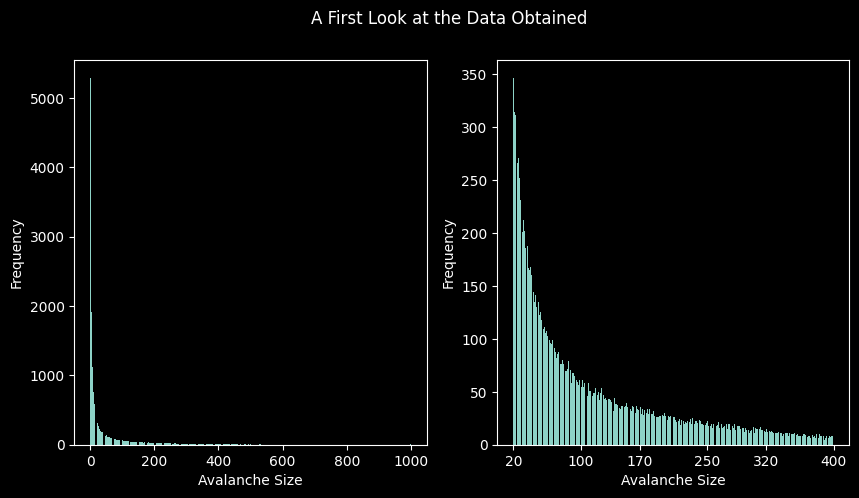

In [74]:
"""
A first look at the data obtained:
"""


ys = np.mean(data, axis=0)[1:]

fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("A First Look at the Data Obtained")
ax[0].bar(x=range(1, len(ys)+1), height=ys)
ax[0].set_xlabel("Avalanche Size")
ax[0].set_ylabel("Frequency")
ax[1].bar(x=range(20, len(ys[20:400])+20), height=ys[20:400])
ax[1].set_xticks([20, 100, 170, 250, 320, 400])
ax[1].set_xlabel("Avalanche Size")
ax[1].set_ylabel("Frequency");

In [75]:
# fig.savefig("SandpileFinal_FirstLook.jpg")

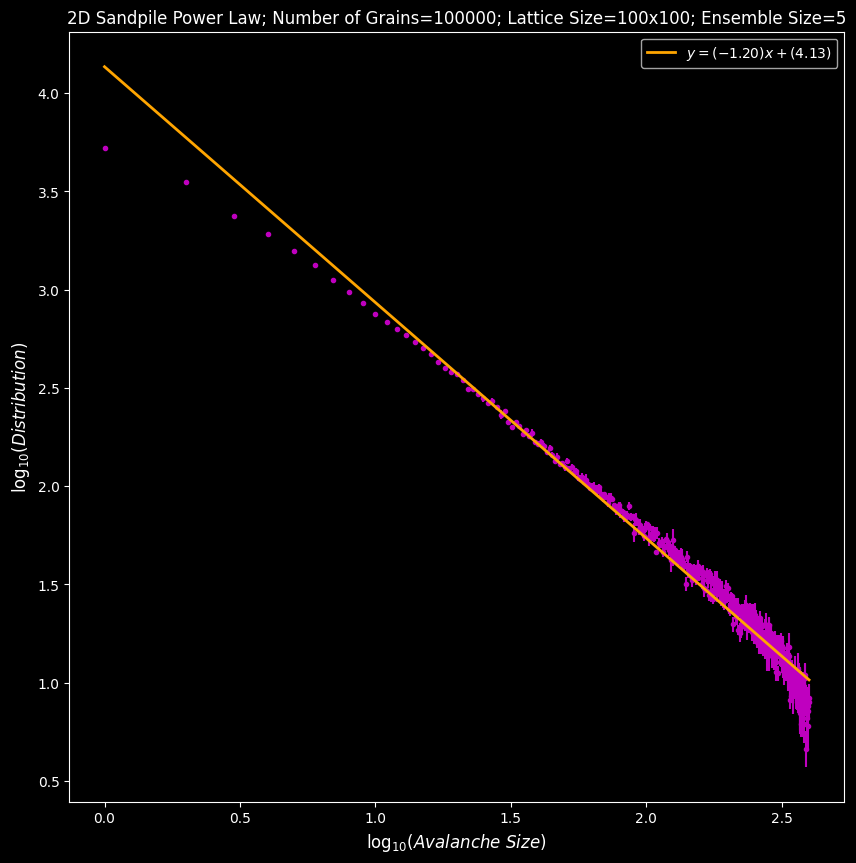

In [91]:
"""
Plotting the data and checking the sandpile power law.
By looking at the plots above, it seems reasonable to rid of avalanche sizes
above 400, since their frequency of occurrence is negligible and render the calculations
prone to error.
"""


# In general, because of using logarithms (and divisions in polyfit), I had to do
# a little bit of cleaning and slice up arrays to avoid 0 and 1 in my calculations.
# The first column of data is zero:
ys = np.mean(data, axis=0)[1:400]
# Uncomment the line below so that the values up to the first 0 are accounted for and the rest are disregarded:
# ys = ys[0:np.argwhere(ys==0)[0][0]]
xs = range(1, len(ys)+1)
# Changing the values to the logarithm of values:
xs = np.log10(xs)
ys = np.log10(ys)
# Fitting a line:
coefs, cov = np.polyfit(xs, ys, deg=1, cov=True)
# Initializing the plot:
fig, ax = plt.subplots(figsize=(10,10))
# Plotting the fitted line:
ax.plot(xs, np.polyval(coefs,xs), color="orange", linewidth=2, label=f"$y = ({coefs[0]:.2f})x + ({coefs[1]:.2f})$")
ax.set_title(f"2D Sandpile Power Law; Number of Grains={num_grains}; Lattice Size=100x100; Ensemble Size=5")
ax.set_xlabel("$\log_{{10}}(Avalanche \ Size)$", fontsize=12)
ax.set_ylabel("$\log_{{10}}(Distribution)$", fontsize=12)
ax.legend()
# Plotting the error bar scatter plot; again slicing up "data" to avoid 0 and 1:
ax.errorbar(xs, ys,
            yerr=np.std(np.log10(data[:,1:len(ys)+1]), axis=0)/np.sqrt(ensemble_size-1),
            fmt=".",
            color="m",
            zorder=1);

In [96]:
print("The uncertainty of the slope:      ", np.sqrt(np.diag(cov))[0])
print("The uncertainty of the y intercept:", np.sqrt(np.diag(cov))[1])

The uncertainty of the slope:       0.008593911919654737
The uncertainty of the y intercept: 0.01900525176056467


In [97]:
# fig.savefig("SandpileFinalUpto400.jpg")